 [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('titanic_train.csv')

In [0]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
len(train)

891

In [0]:
train['Pclass'].unique()

array([3, 1, 2])

In [0]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [0]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)



## Missing Data

In [0]:
train.isnull()

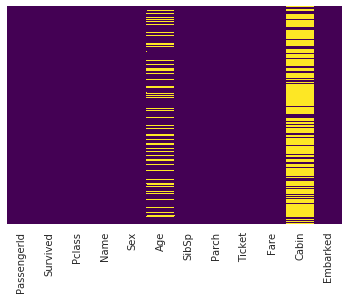

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

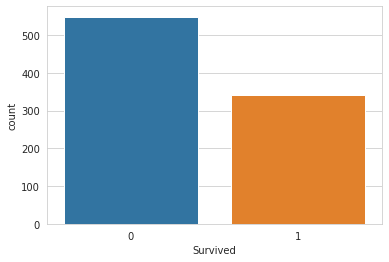

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

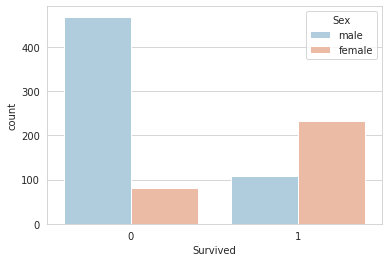

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

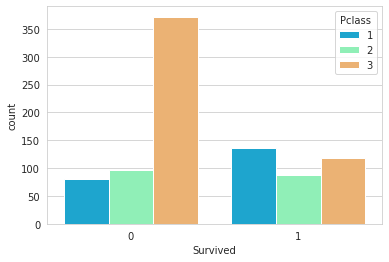

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

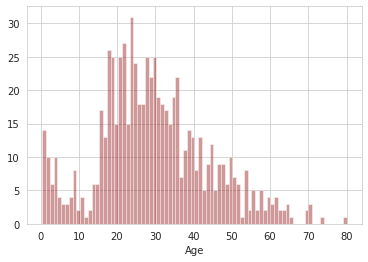

In [0]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=80)

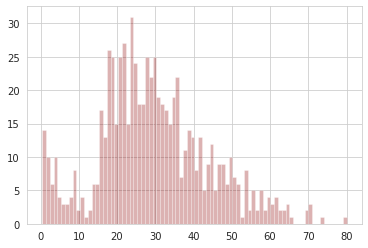

In [0]:
train['Age'].hist(bins=80,color='darkred',alpha=0.3)

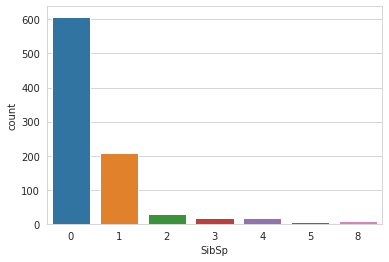

In [0]:
sns.countplot(x='SibSp',data=train)

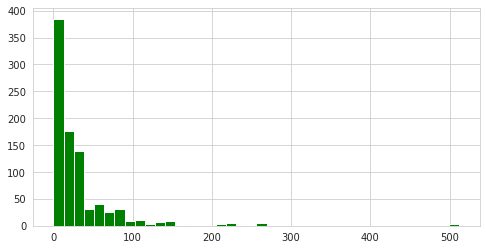

In [0]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [0]:
train['Fare'].max()

512.3292

In [0]:
train['Fare'].min()

0.0

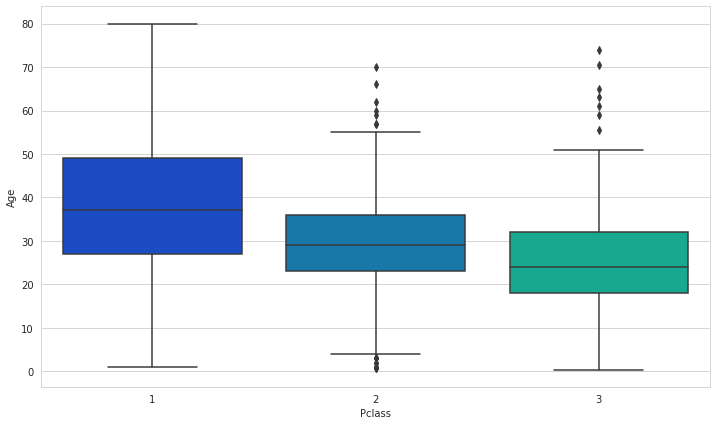

In [0]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [0]:
def impute_age(cols):
    Age = cols[0] 
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [0]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

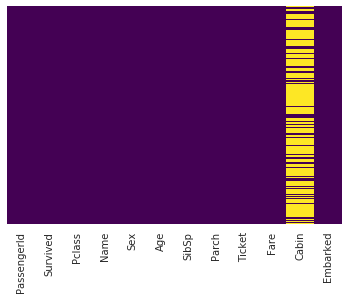

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.drop('Cabin',axis=1,inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


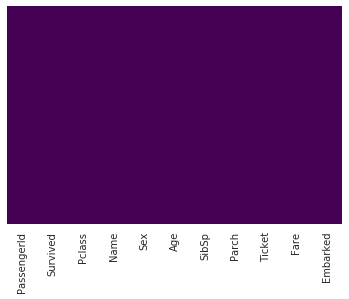

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
iris = pd.read_csv('iris.csv')

In [0]:
iris.shape

(150, 5)

In [0]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [0]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

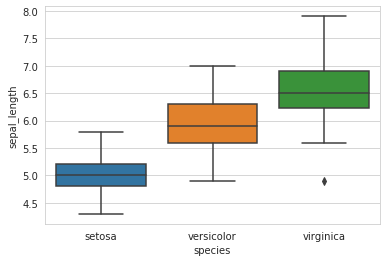

In [0]:
#UNI-VARIATE ANALYSIS
sns.boxplot(x='species',y='sepal_length', data=iris)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


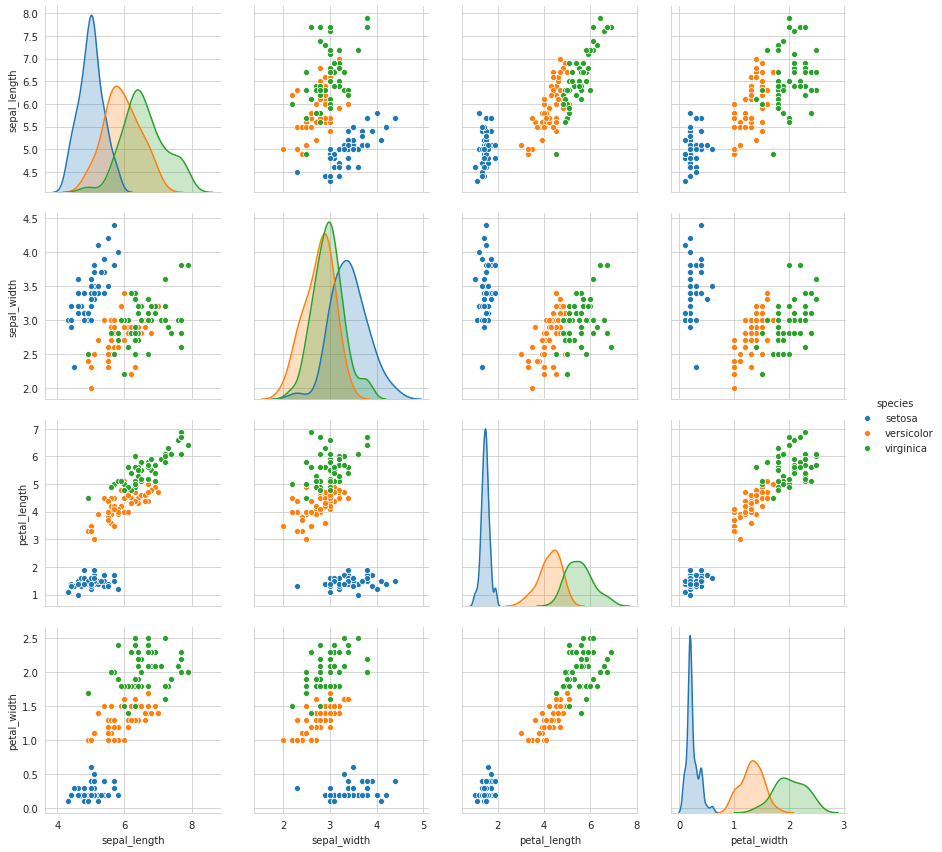

In [0]:
#BI-VARIATE ANALYSIS
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()